1. Import libraries

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

c:\Users\ACER\ANA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


2. Load dataset

In [2]:
df = pd.read_csv("shopping_trends.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.shape

(3900, 19)

In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


In [8]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [9]:
df.duplicated().sum()

0

3. Analysis

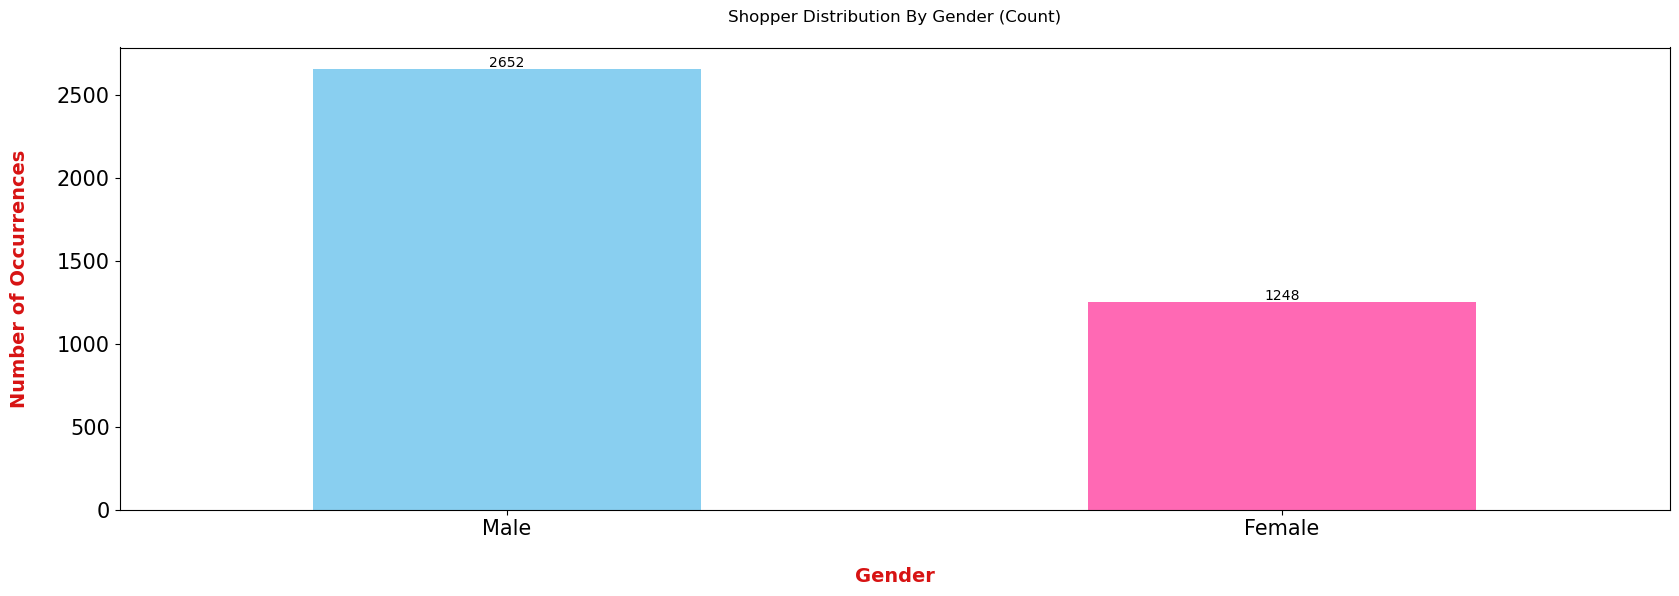

In [10]:
#Shopper distribution by gender (count)
plt.figure(figsize = (20, 6))
ax = df['Gender'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))
plt.xlabel('Gender', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Shopper Distribution By Gender (Count)\n')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.show()

The majority of shoppers are male, accounting for 2,652 individuals, while female shoppers make up 1,248. This indicates that male customers are more active in shopping compared to female counterparts.

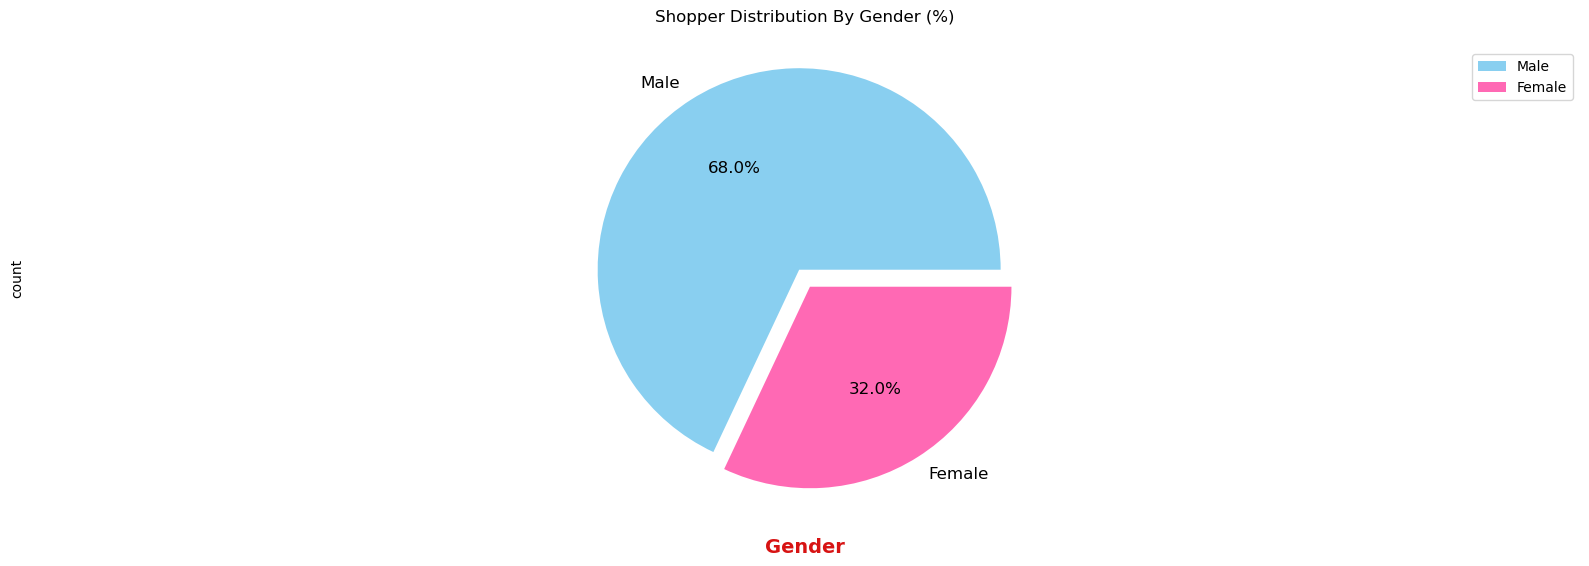

In [11]:
#Shopper distribution by gender (percentage)
plt.figure(figsize = (20, 6))
df['Gender'].value_counts().plot(kind = 'pie', fontsize = 12, colors = colors, explode = (0, 0.1), autopct = '%1.1f%%')
plt.xlabel('Gender', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Gender'].value_counts().index, loc = 'best')
plt.title('Shopper Distribution By Gender (%)\n')
plt.show()

Further supporting the previous analysis, the bar chart shows that the number of male shoppers (68.0%) is significantly higher than that of female shoppers (32.0%). This reinforces the observed gender disparity, as male customers not only make up a larger proportion but also outnumber female shoppers in absolute count.

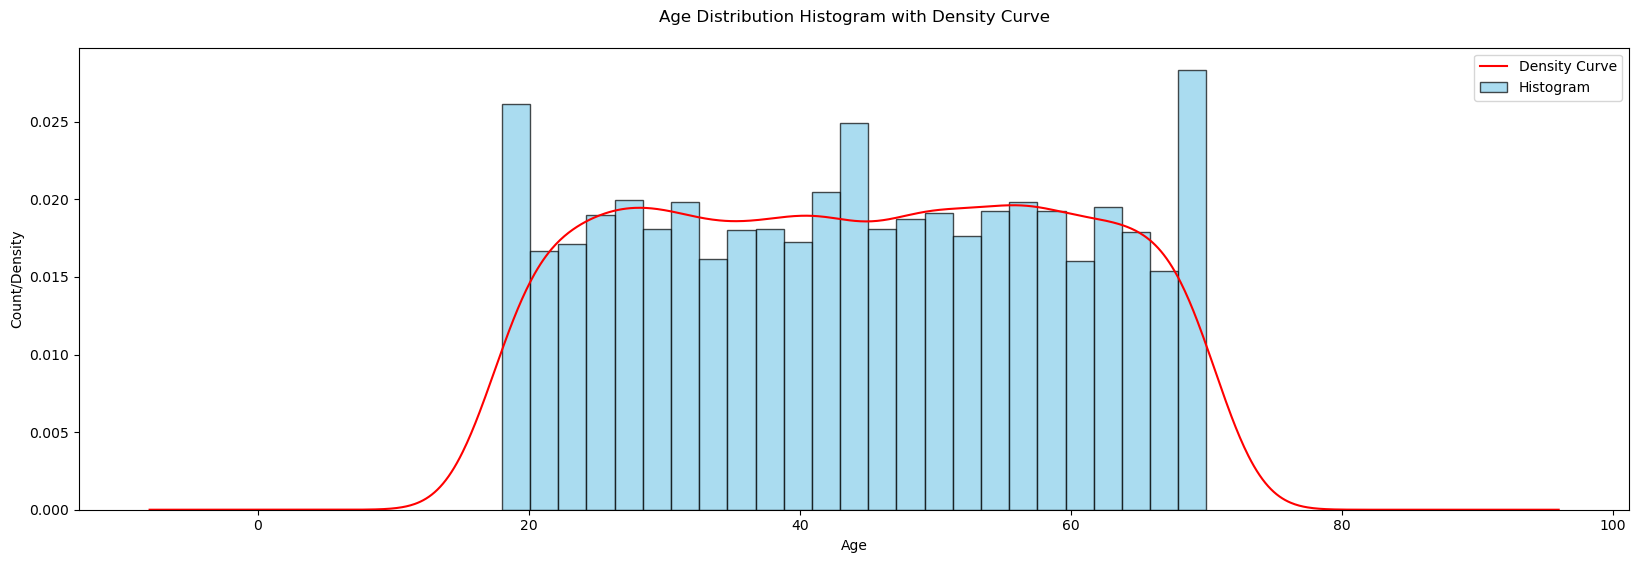

In [12]:
#Shopper distribution by age
fig, ax = plt.subplots(figsize = (20, 6))
ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)
ax.set_xlabel('Age')
ax.set_ylabel('Count/Density')
ax.set_title('Age Distribution Histogram with Density Curve\n')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

The histogram and density curve illustrate the age distribution of shoppers. The distribution appears fairly uniform across most age groups, with a slight concentration in the middle-aged range. There are relatively fewer younger and older shoppers, as indicated by the tapering density curve at both ends.

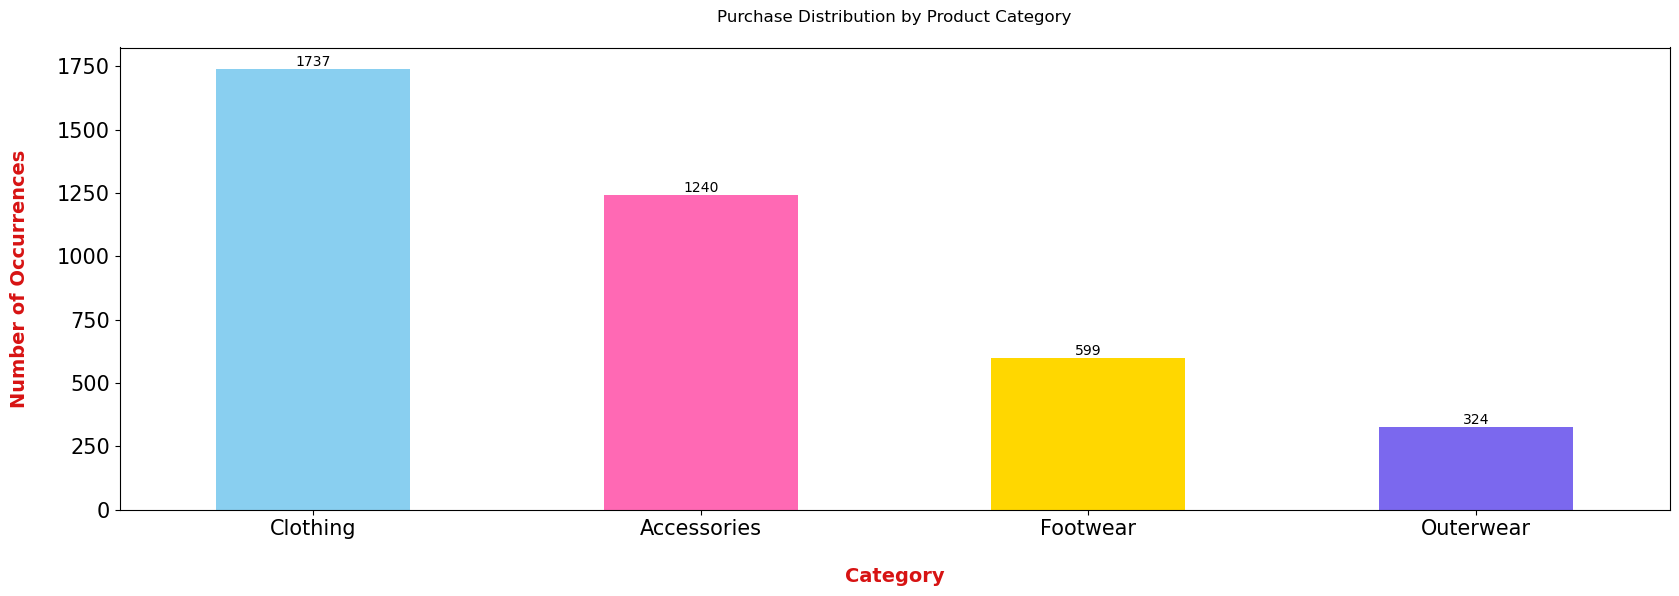

In [13]:
#Purchase distribution by product category
plt.figure(figsize = (20, 6))
ax = df['Category'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels = (df['Category'].value_counts().index)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Category', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Purchase Distribution by Product Category\n')
plt.show()

This suggests that shoppers prioritize clothing and accessories over other categories.

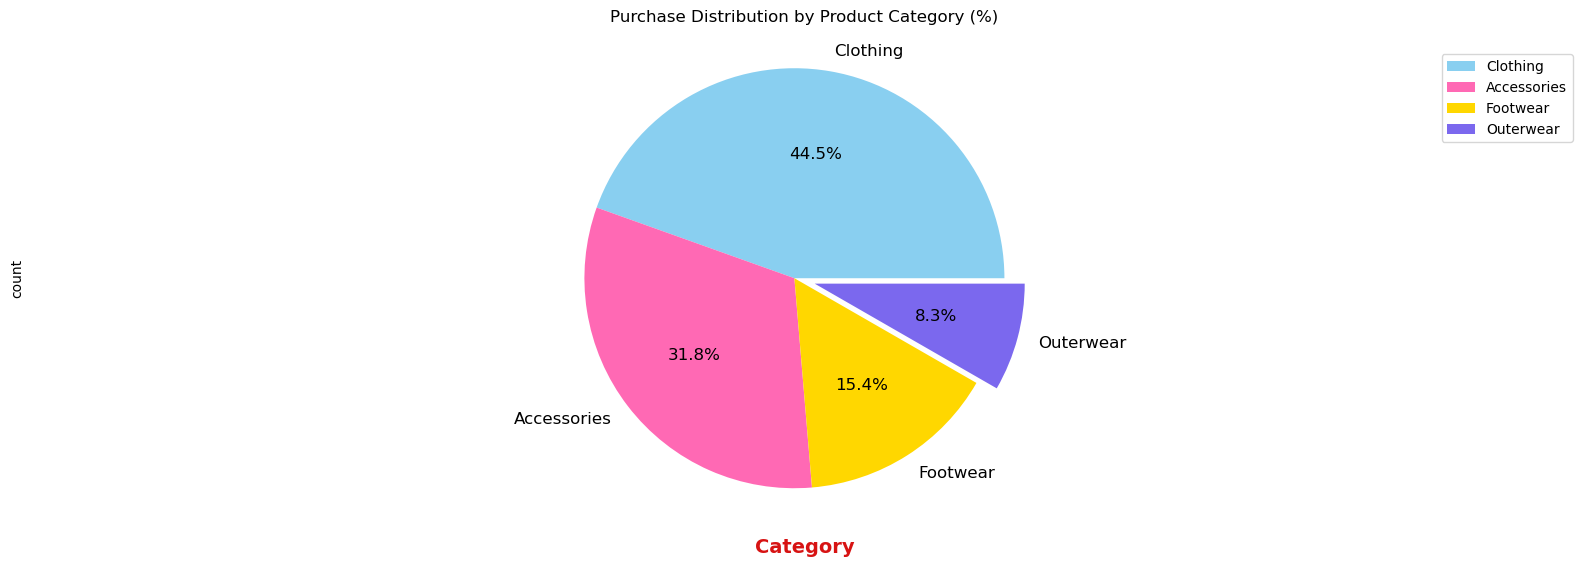

In [14]:
#Purchase distribution by product category (%)
plt.figure(figsize = (20, 6))
df['Category'].value_counts().plot(kind = 'pie', fontsize = 12, colors = colors, explode = (0, 0, 0, 0.1), autopct = '%1.1f%%')
plt.xlabel('Category', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Category'].value_counts().index, loc = 'best')
plt.title('Purchase Distribution by Product Category (%)\n')
plt.show()

Further supporting the previous analysis, the bar chart shows that the number of clothing and accessories purchases (44.5% and 31.8% respectively) is significantly higher than that of footwear and outerwear (15.4% and 8.3% respectively).

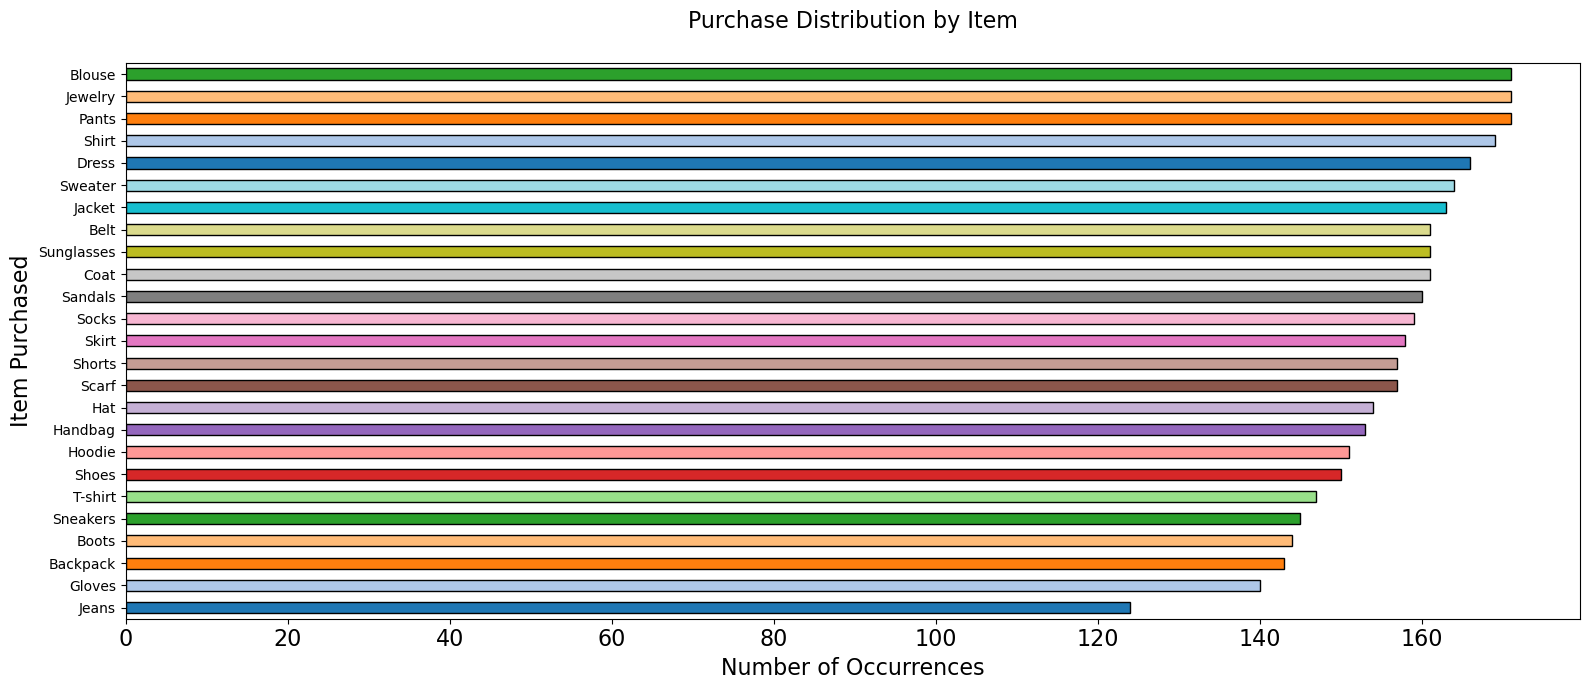

In [15]:
#Purchase distribution by item
plt.figure(figsize = (16, 7))
df['Item Purchased'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('Number of Occurrences', fontsize = 16)
plt.title('Purchase Distribution by Item\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

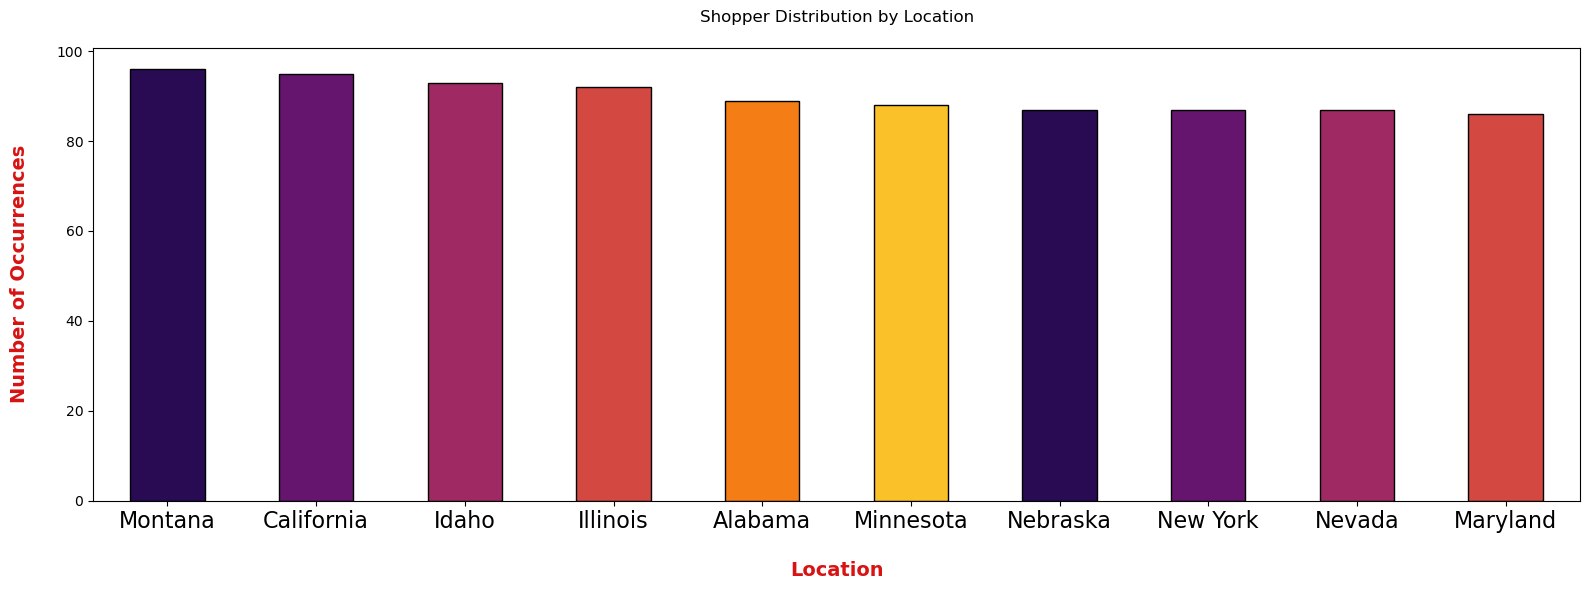

In [16]:
#Shopper distribution by location
plt.figure(figsize = (16, 6))
df['Location'].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.title('Shopper Distribution by Location\n')
plt.tight_layout()
plt.show()

Shoppers are distributed almost evenly throughout the states.

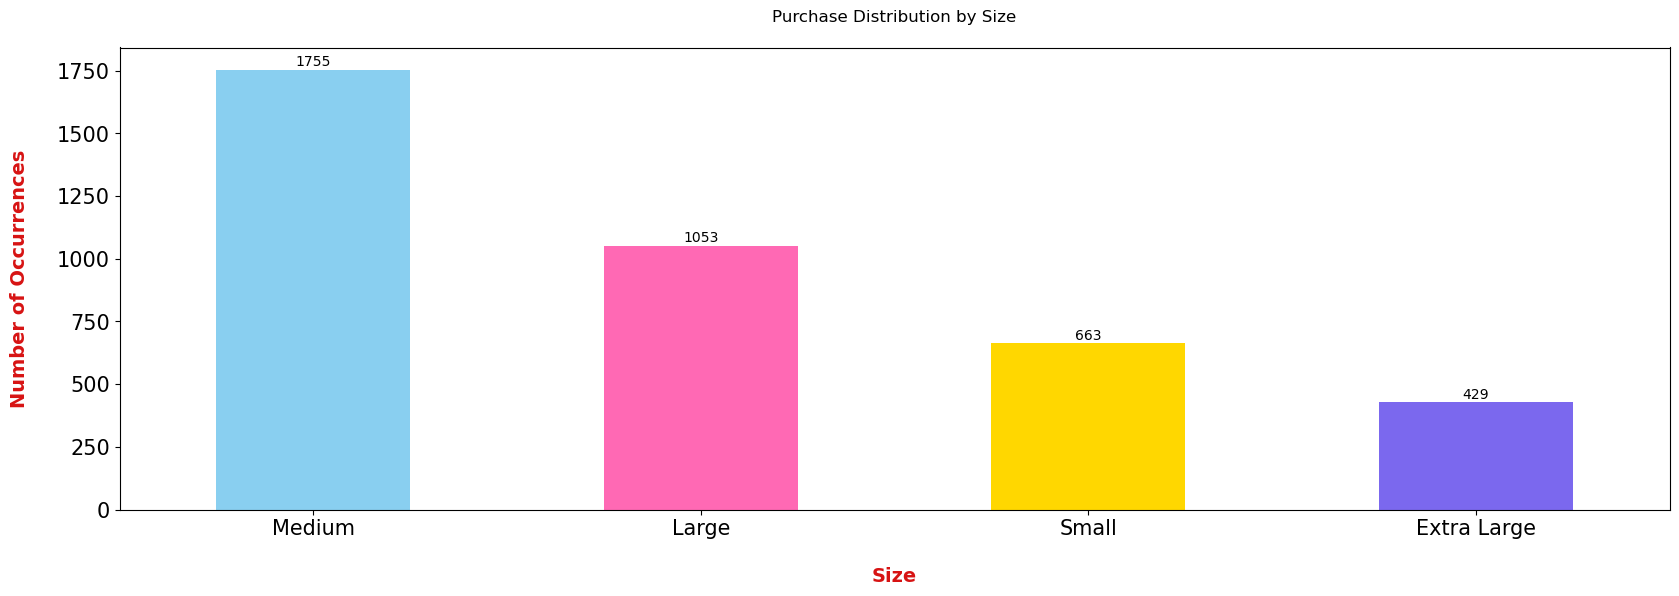

In [17]:
#Purchase distribution by size
plt.figure(figsize = (20, 6))
ax = df['Size'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(['Medium', 'Large', 'Small', 'Extra Large'])
plt.xlabel('Size', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Purchase Distribution by Size\n')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.show()

This suggests that medium size is prioritized significantly among the available sizes.

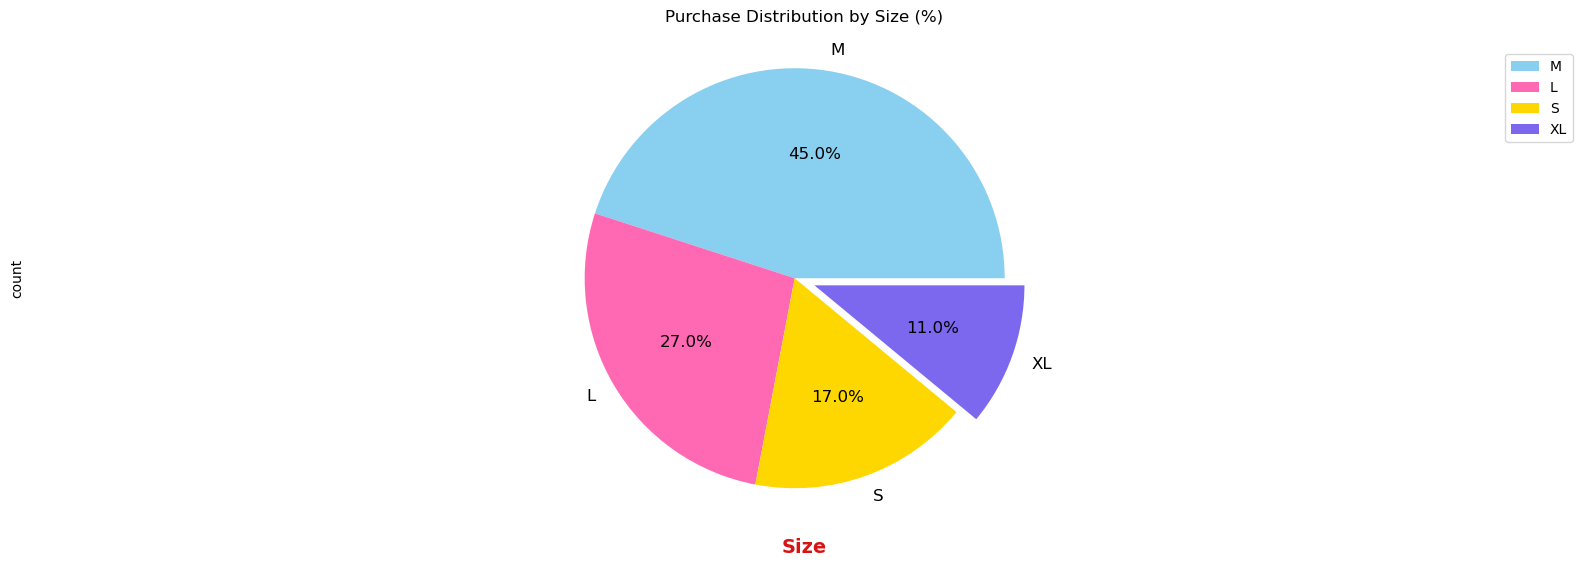

In [18]:
#Purchase distribution by size (%)
plt.figure(figsize = (20, 6))
df['Size'].value_counts().plot(kind = 'pie', fontsize = 12, colors = colors, explode = (0, 0, 0, 0.1), autopct = '%1.1f%%')
plt.xlabel('Size', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Size'].value_counts().index, loc = 'best')
plt.title('Purchase Distribution by Size (%)\n')
plt.show()

Further supporting the previous analysis, the pie chart shows that the number of M-size purchases (45.0%) is significantly higher than that of the others.

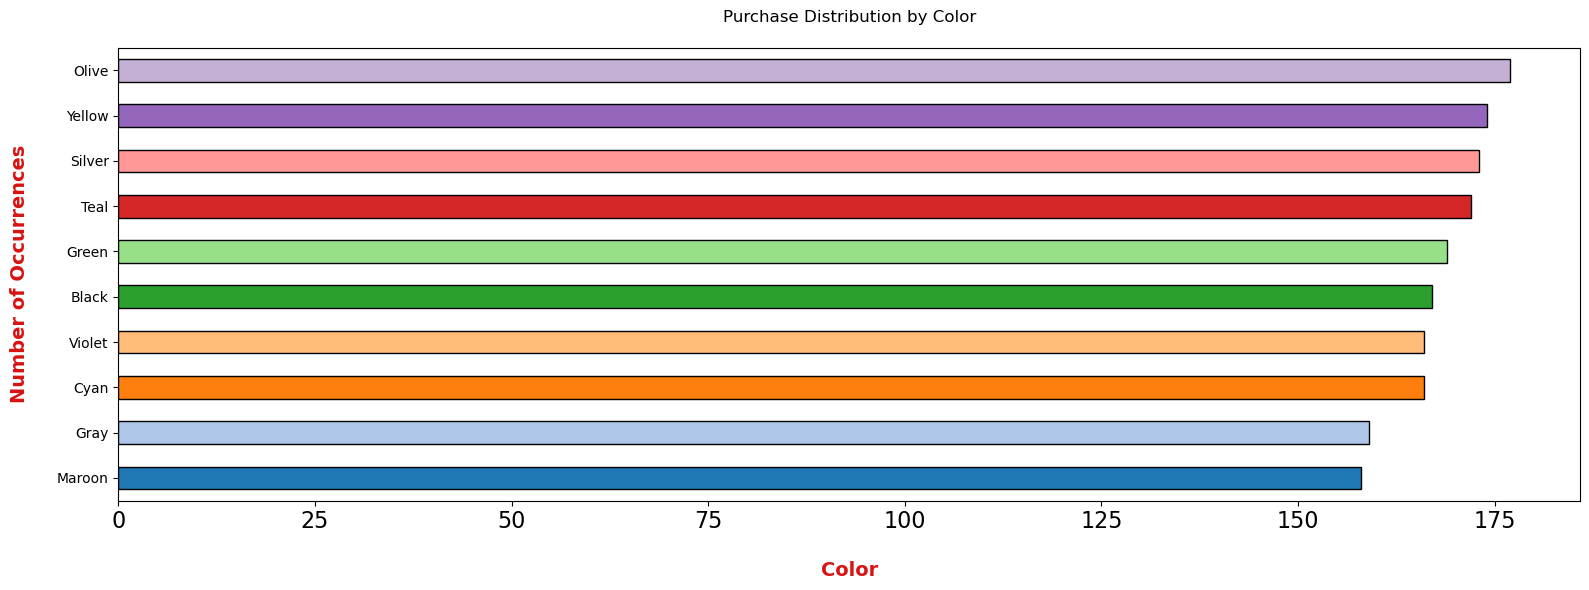

In [19]:
#Purchase distribution by color
plt.figure(figsize = (16, 6))
df['Color'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.title('Purchase Distribution by Color\n')
plt.tight_layout()
plt.show()

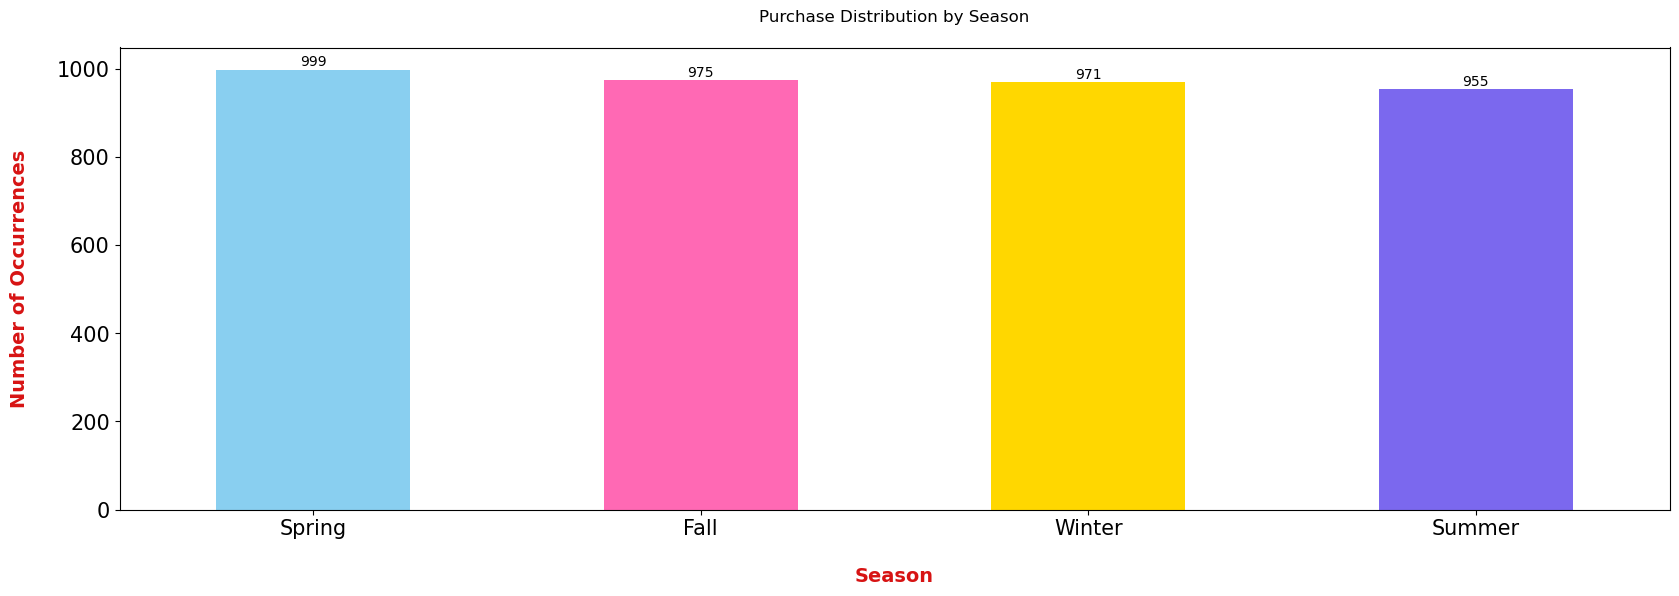

In [20]:
#Purchase distribution by season
plt.figure(figsize = (20, 6))
ax = df['Season'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(df['Season'].value_counts().index)
plt.xlabel('Season', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Purchase Distribution by Season\n')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.show()

The bar chart shows that spring had the highest number of purchases (999), followed closely by fall (975) and winter (971). Summer had the lowest (955), but the differences among seasons are minor. This suggests slightly higher shopping activity in spring, while overall demand remains steady year-round.

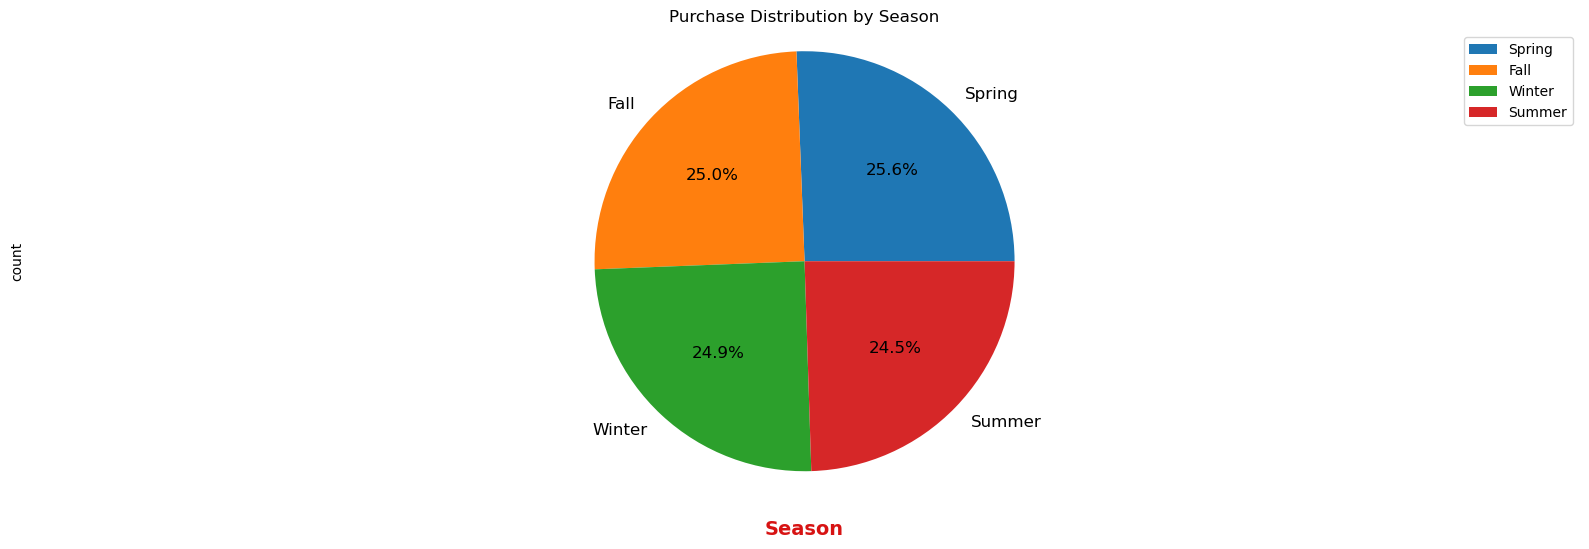

In [21]:
#Purchase distribution by season (%)
plt.figure(figsize = (20, 6))
df['Season'].value_counts().plot(kind = 'pie', fontsize = 12, color = colors, explode = (0, 0, 0, 0), autopct = '%1.1f%%')
plt.xlabel('Season', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Season'].value_counts().index, loc = 'best')
plt.title('Purchase Distribution by Season')
plt.show()

Further supporting the previous analysis, the pie chart proves an almost equal distribution between the seasons.

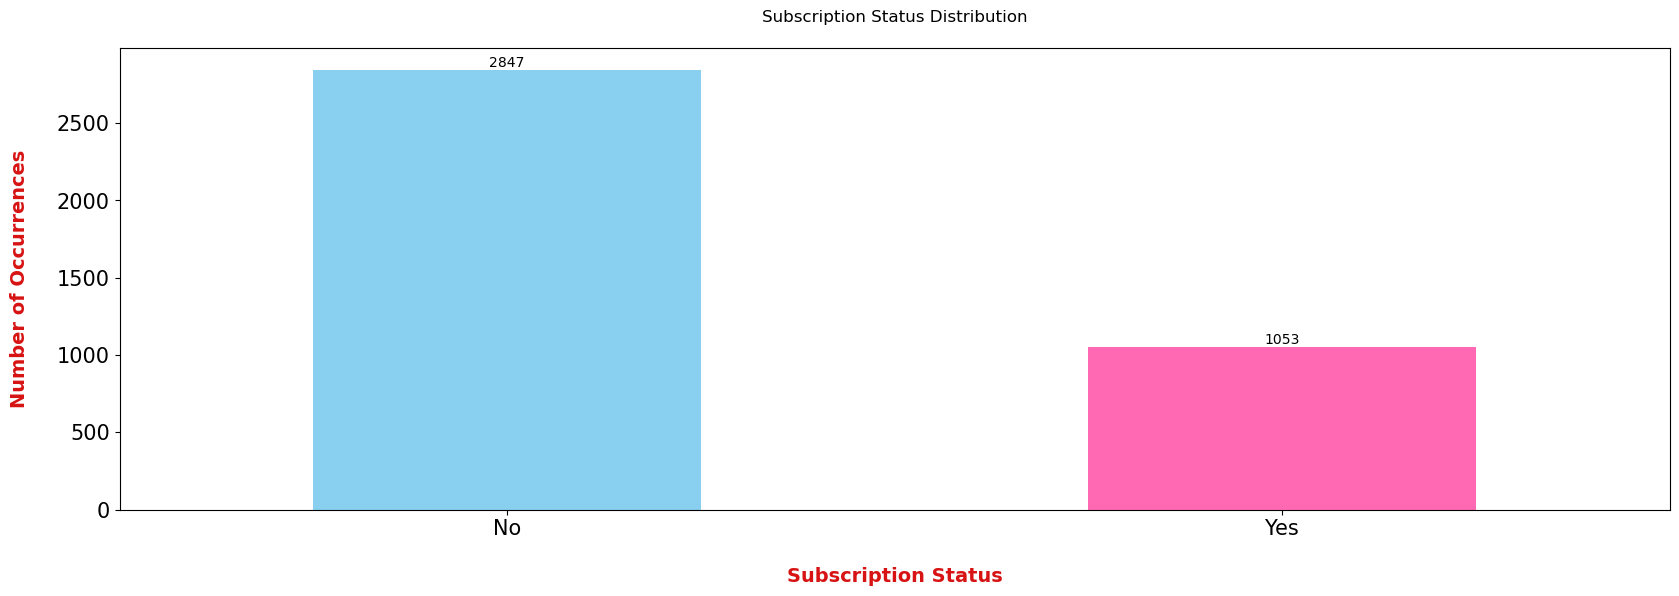

In [22]:
#Subscription status distribution
plt.figure(figsize = (20, 6))
ax = df['Subscription Status'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(df['Subscription Status'].value_counts().index)
plt.xlabel('Subscription Status', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Subscription Status Distribution\n')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.show()

The bar chart shows that a significant majority of customers (2,847) are not subscribed, compared to 1,053 who are. This indicates that the majority of shoppers do not utilize the subscription service. The low subscription rate suggests a need for better communication of the service's benefits to enhance customer engagement.

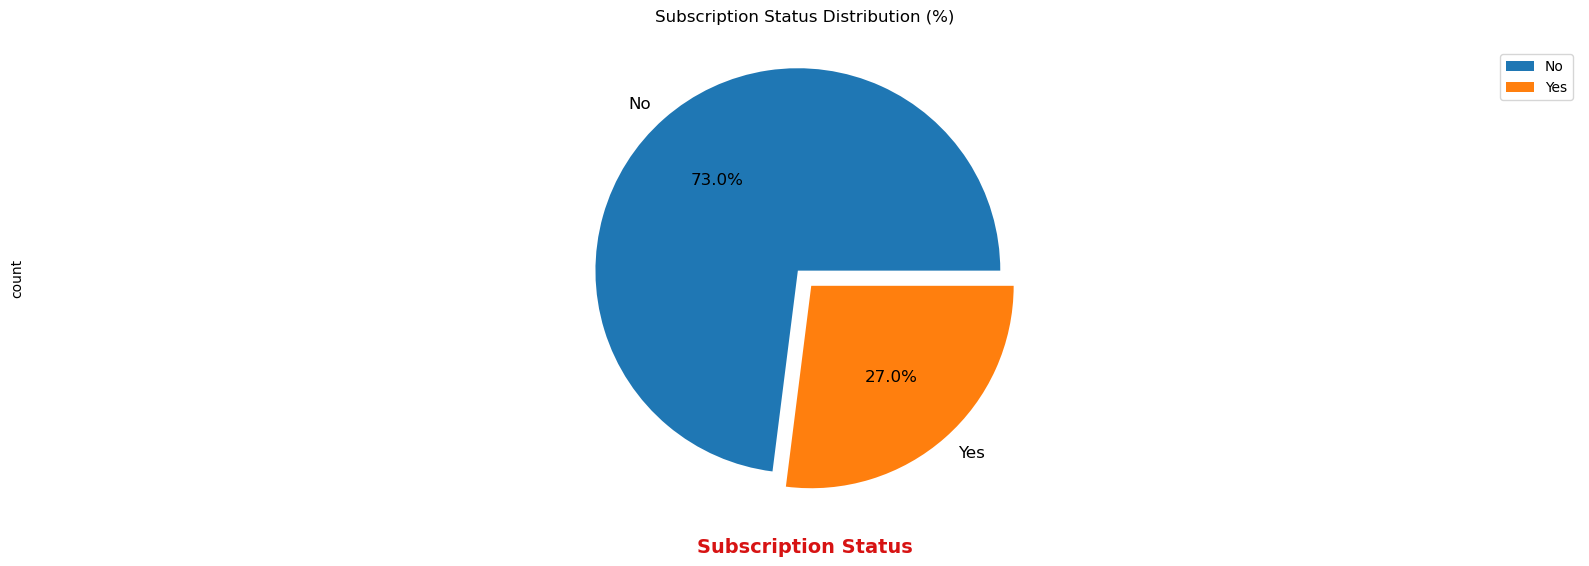

In [23]:
#Subscription status distribution (%)
plt.figure(figsize = (20, 6))
df['Subscription Status'].value_counts().plot(kind = 'pie', fontsize = 12, color = colors, explode = (0, 0.1), autopct = '%1.1f%%')
plt.xlabel('Subscription Status', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Subscription Status'].value_counts().index, loc = 'best')
plt.title('Subscription Status Distribution (%)\n')
plt.show()

The pie chart confirms the same trend as the previous bar chart, showing that 73% of customers are not subscribed, while only 27% are. This consistent date reinforces the need for improved communication of the subscription service's benefits to increase customer engagement.

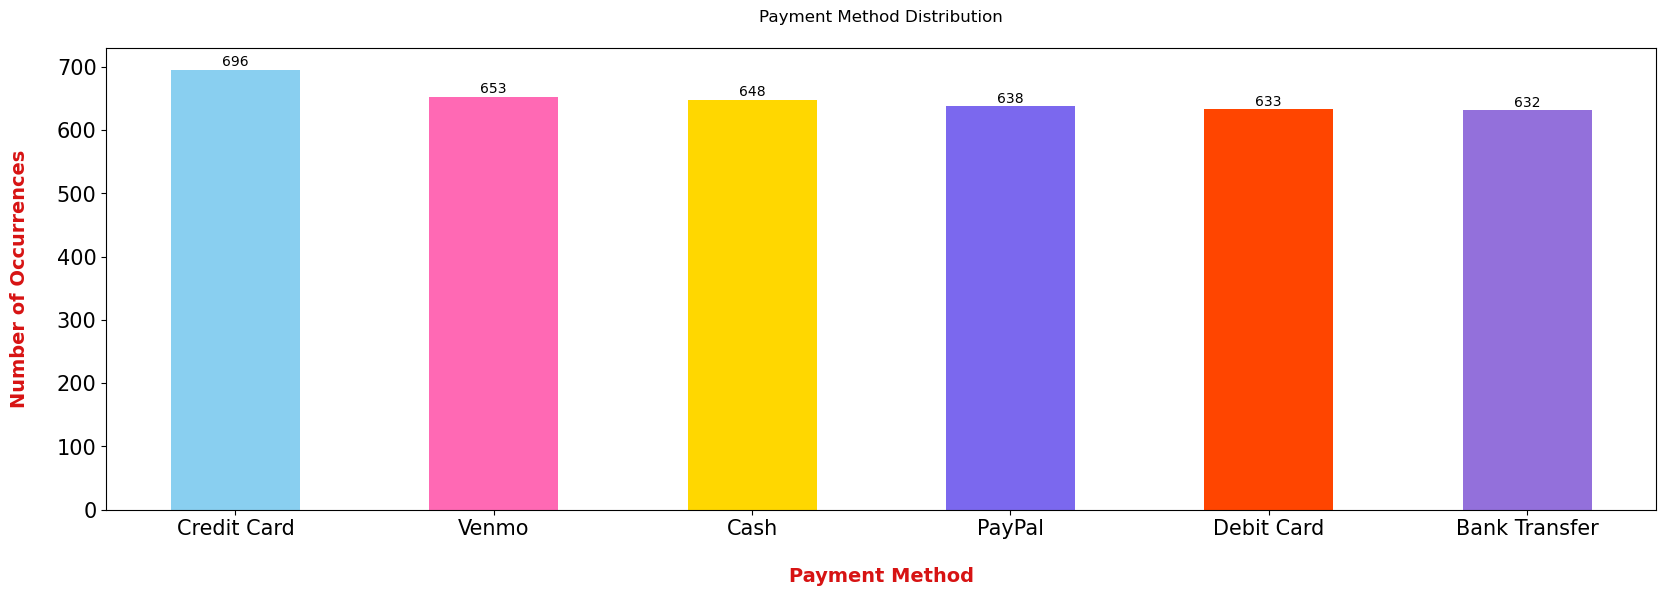

In [24]:
#Payment method distribution
plt.figure(figsize = (20, 6))
ax = df['Payment Method'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(df['Payment Method'].value_counts().index)
plt.xlabel('Payment Method', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Payment Method Distribution\n')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.show()

The bar chart shows that credit card is the most popular payment method, totaling 696 transactions, followed by Venmo at 653. Other methods include cash at 648, PayPal at 638, and debit card at 633, with bank transfer being the least used at 632. This data indicates a strong preference for digital payment options among customers.

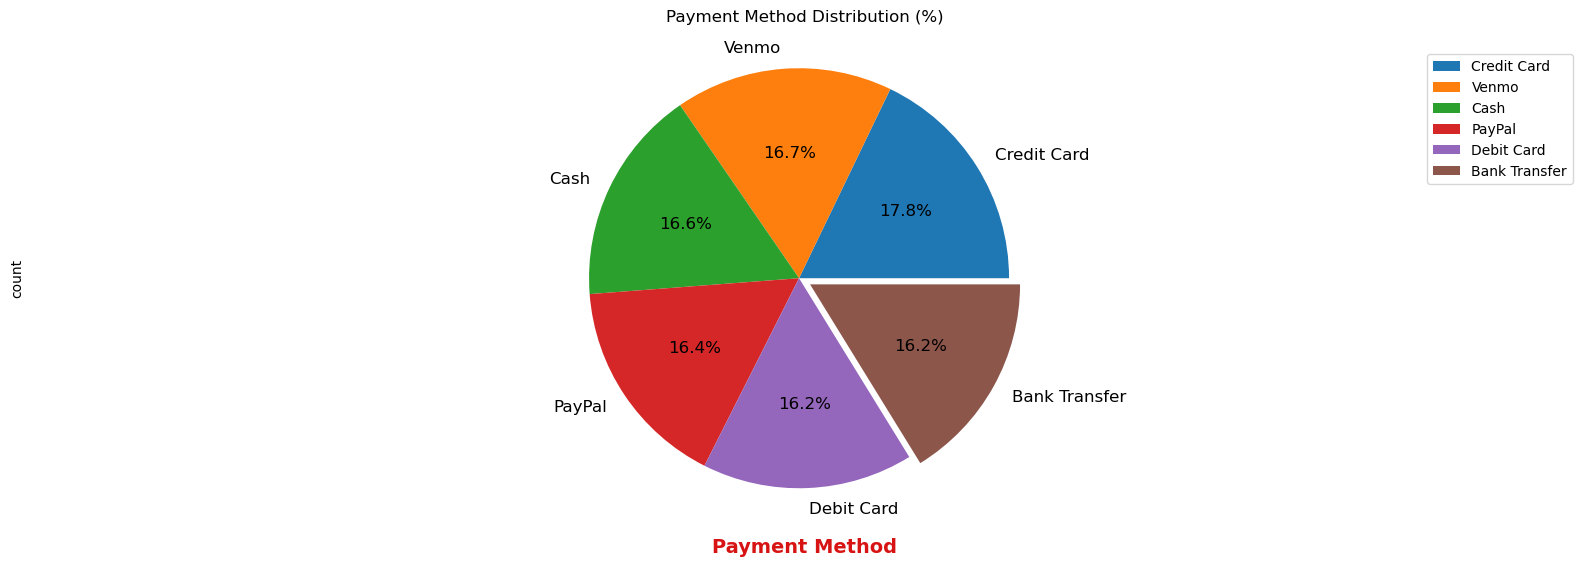

In [25]:
#Payment method distribution (%)
plt.figure(figsize = (20, 6))
df['Payment Method'].value_counts().plot(kind = 'pie', fontsize = 12, color = colors, explode = (0, 0, 0, 0, 0, 0.06), autopct = '%1.1f%%')
plt.xlabel('Payment Method', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Payment Method'].value_counts().index, loc = 'best')
plt.title('Payment Method Distribution (%)\n')
plt.show()

The pie chart confirms the same trend for the previous bar chart, with credit card making up the largest segment at approximately 18%, followed closely by Venmo at 16.7% and cash at 16.6%. This indicates a strong preference for digital payment options among customers.

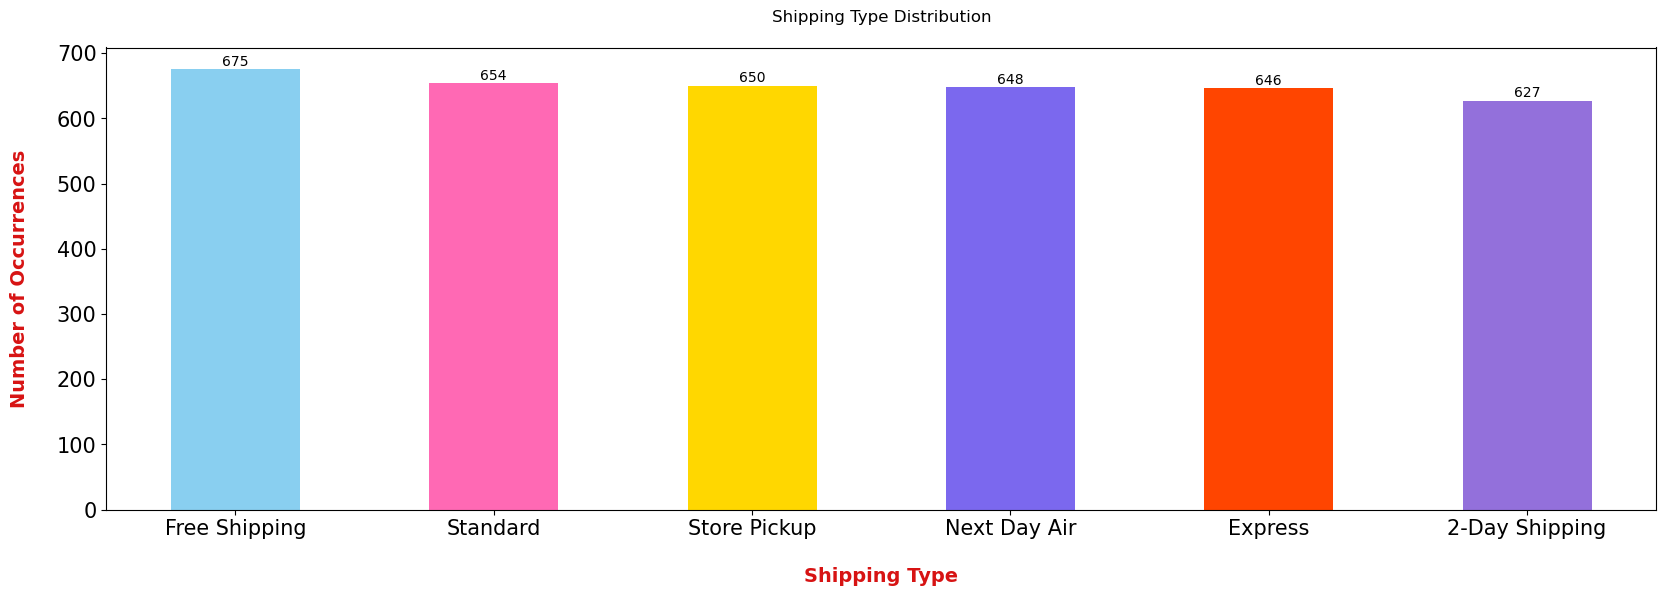

In [26]:
#Shipping type distribution
plt.figure(figsize = (20, 6))
ax = df['Shipping Type'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(df['Shipping Type'].value_counts().index)
plt.xlabel('Shipping Type', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Shipping Type Distribution\n')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.show()

The bar chart shows the distribution of shipping methods chosen by customers. Free shipping is the most preferred option (675), followed closely by standard (654) and store pickup (650). Other types like next day air, express and 2-day shipping are also selected at similar rates, suggesting diverse delivery preferences.

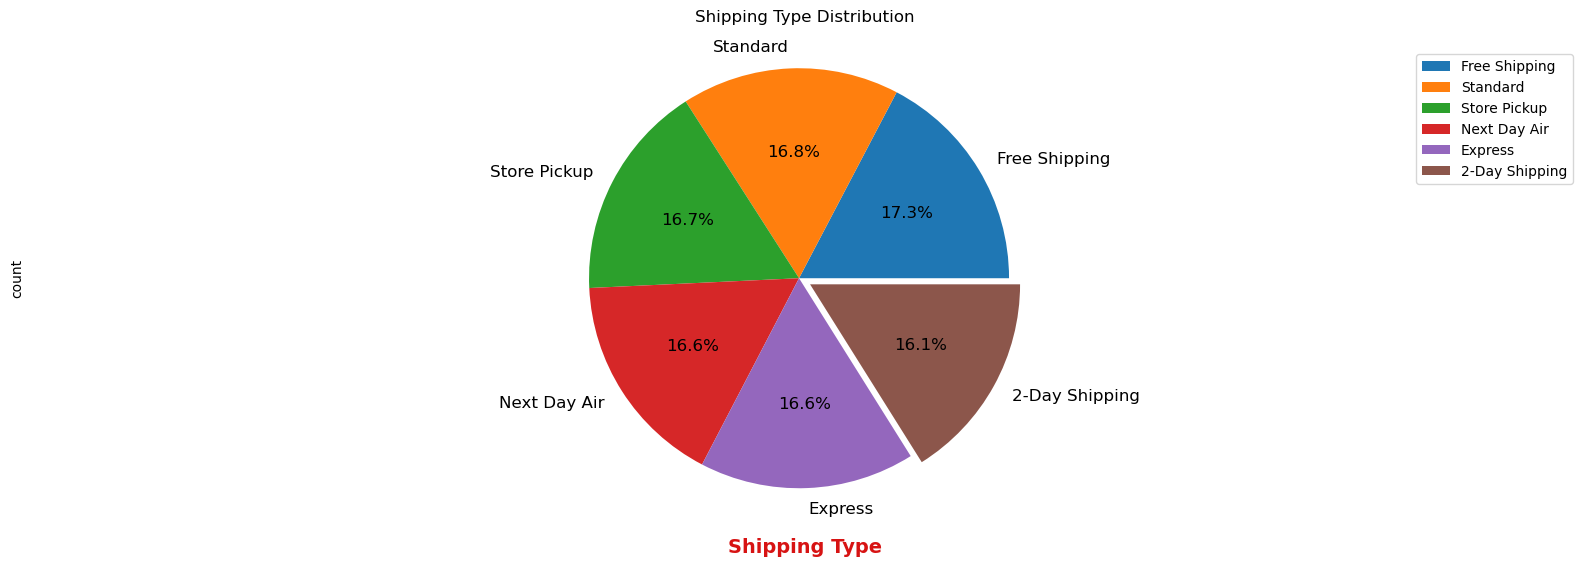

In [27]:
#Shipping type distribution (%)
plt.figure(figsize = (20, 6))
df['Shipping Type'].value_counts().plot(kind = 'pie', fontsize = 12, color = colors, explode = (0, 0, 0, 0, 0, 0.06), autopct = '%1.1f%%')
plt.xlabel('Shipping Type', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Shipping Type'].value_counts().index, loc = 'best')
plt.title('Shipping Type Distribution\n')
plt.show()

The pie chart reflects a similar trend to the bar chart, with free shipping taking up the largest portion of total deliveries (17.3%). The other shipping methods follow closely behind with comparable percentages, indicating consistent customer preferences across both visualizations.

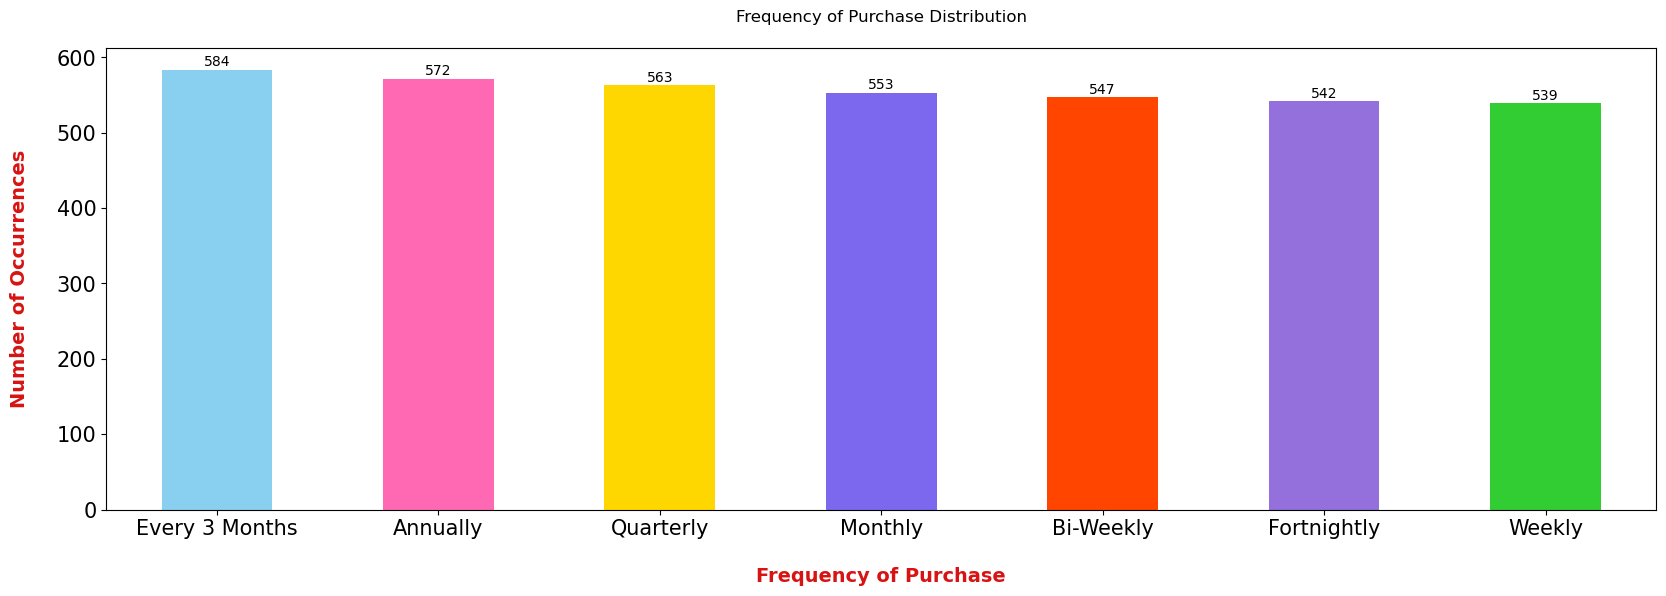

In [28]:
#Frequency of purchase distribution
plt.figure(figsize = (20 , 6))
ax = df['Frequency of Purchases'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(df['Frequency of Purchases'].value_counts().index)
plt.xlabel('Frequency of Purchase', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Frequency of Purchase Distribution\n')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.show()

The bar chart shows that most customers make purchases every 3 months (584), followed by annual (572) and quarterly (563) frequencies. Monthly and bi-weekly purchases are also common, with 553 and 547 occurrences respectively. Weekly purchases have the lowest count of 539, but overall, the data shows a fairly even distribution across different purchase frequencies.

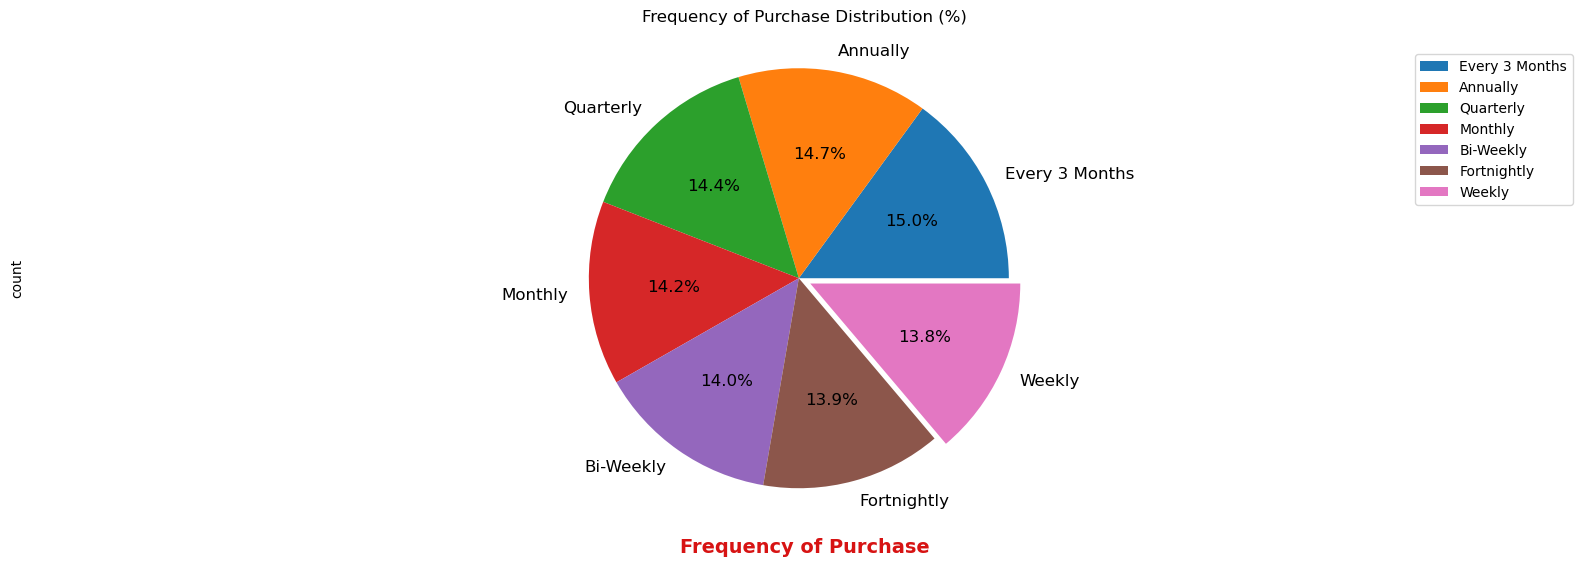

In [29]:
#Frequency of purchase distribution (%)
plt.figure(figsize = (20, 6))
df['Frequency of Purchases'].value_counts().plot(kind = 'pie', fontsize = 12, color = colors, explode = (0, 0, 0, 0, 0, 0, 0.06), autopct = '%1.1f%%')
plt.xlabel('Frequency of Purchase', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Frequency of Purchases'].value_counts().index, loc = 'best')
plt.title('Frequency of Purchase Distribution (%)\n')
plt.show()

The pie chart highlights a fairly balanced distribution of purchase frequencies. Every 3 months holds the largest share (15%), closely followed by annual and quarterly purchases (14.7% and 14.4% respectively). Despite slight variations, each category contributes a notable portion, reflecting diverse shopping habits among customers. This chart mirrors the same trend observed in the previous bar chart.

In [30]:
#What is the average age of the customers?

average_age = df['Age'].mean()
print('The average age of the customers is', round(average_age, 0))

The average age of the customers is 44.0


In [31]:
#What is the most common item purchased?

most_common_item = df['Item Purchased'].mode()[0]
print('The most common item purchased is', most_common_item)

The most common item purchased is Blouse


In [32]:
#What is the total purchase amount for each category?

total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending = False)
print('Total Purchase Amount by Category:')
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [33]:
#What is the average review rating for male customers and female customers?

average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print('The average review rating for male customers is', round(average_rating_male, 2))
print('The average review rating for female customers is', round(average_rating_female, 2))

The average review rating for male customers is 3.75
The average review rating for female customers is 3.74


In [34]:
#What is the most common payment method used by customers?

most_common_payment_method = df['Payment Method'].mode()[0]
print('The most common payment method is', most_common_payment_method)

The most common payment method is Credit Card


In [35]:
#What is the median purchase amount (USD)?

median_purchase_amount = df['Purchase Amount (USD)'].median()
print('The median purchase amount (USD) is', round(median_purchase_amount, 2))

The median purchase amount (USD) is 60.0


In [36]:
#How many customers have opted for the subscription?

subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print(f'There are {subscription_count} customers opting for the subscription')

There are 1053 customers opting for the subscription


In [37]:
#What is the average purchase amount for customers with a subscription status of Yes and No?

avg_purchase_subscription_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_subscription_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print('The average purchase amount for customers with a subscription status of yes is', round(avg_purchase_subscription_yes, 2))
print('The average purchase amount for customers with a subscription status of no is', round(avg_purchase_subscription_no, 2))

The average purchase amount for customers with a subscription status of yes is 59.49
The average purchase amount for customers with a subscription status of no is 59.87


In [38]:
#What is the most common season for purchases?

most_common_season = df['Season'].mode()[0]
print('The most common season for purchases is', most_common_season)

The most common season for purchases is Spring


In [39]:
#What is the total purchase amount for each gender?

total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum().sort_values(ascending = False)
print('Total Purchase Amount by Gender:')
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender
Male      157890
Female     75191
Name: Purchase Amount (USD), dtype: int64


In [40]:
#What is the average age of customers who made purchases in the summer season?

average_age_summer = df[df['Season'] == 'Summer']['Age'].mean()
print('The average age of customers who made purchases in the summer season is', round(average_age_summer))

The average age of customers who made purchases in the summer season is 44


In [41]:
#How many customers used a promo code for their purchases?

promo_code_count = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
print('The number of customers using a promo code for their purchases is', promo_code_count)

The number of customers using a promo code for their purchases is 1677


In [42]:
#What is the maximum and minimum review rating in the dataset?

max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print('The maximum review rating is', max_review_rating)
print('The minimum review rating is', min_review_rating)

The maximum review rating is 5.0
The minimum review rating is 2.5


In [43]:
#What is the most common shipping type for customers with a review rating above 4?

common_shipping_high_rating = df[df['Review Rating'] > 4]['Shipping Type'].mode()[0]
print('The most common shipping type for customers with a review rating above 4 is', common_shipping_high_rating)

The most common shipping type for customers with a review rating above 4 is Standard


In [44]:
#How many customers have made more than 30 previous purchases?

customers_above_30_previous_purchases = df[df['Previous Purchases'] > 30]['Customer ID'].count()
print(f'There are {customers_above_30_previous_purchases} customers who have made more than 30 previous purchases')

There are 1549 customers who have made more than 30 previous purchases


In [45]:
#What is the average purchase amount for customers who have made more than 30 previous purchases?

avg_purchase_above_30_previous_purchase = df[df['Previous Purchases'] > 30]['Purchase Amount (USD)'].mean()
print('The average purchase amount for customers who have made more than 30 previous purchases is', round(avg_purchase_above_30_previous_purchase, 2))

The average purchase amount for customers who have made more than 30 previous purchases is 60.03


In [46]:
#What is the most common payment method for customers who shop in the winter season?

most_common_payment_method_winter = df[df['Season'] == 'Winter']['Payment Method'].mode()[0]
print('The most common payment method for customers who shop in the winter season is', most_common_payment_method_winter)

The most common payment method for customers who shop in the winter season is Credit Card


In [47]:
#What is the total purchase amount for customers with a free shipping shipping type?

total_purchase_free_shipping = df[df['Shipping Type'] == 'Free Shipping']['Purchase Amount (USD)'].sum()
print('The total purchase amount for customers with a free shipping shipping type is', total_purchase_free_shipping)

The total purchase amount for customers with a free shipping shipping type is 40777


In [48]:
#What is the average purchase amount for customers who used a discount?

avg_purchase_with_discount = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
print('The average purchase amount for customers who used a discount is', round(avg_purchase_with_discount, 2))

The average purchase amount for customers who used a discount is 59.28


In [49]:
#What is the most common category of items purchased by female customers with a review rating below 3?

common_category_low_rating_female = df[(df['Gender'] == 'Female') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print('The most common category of items purchased by female customers with a review rating below 3 is', common_category_low_rating_female)

The most common category of items purchased by female customers with a review rating below 3 is Clothing


In [50]:
#What is the average age of customers who made purchases with a review rating above 4 and used a promo code?

average_age_high_rating_promo = df[(df['Review Rating'] > 4) & (df['Promo Code Used'] == 'Yes')]['Age'].mean()
print('The average age of customers who made purchases with a review rating above 4 and used a promo code is', round(average_age_high_rating_promo, 0))

The average age of customers who made purchases with a review rating above 4 and used a promo code is 44.0


In [51]:
#What is the total purchase amount for customers in each location?

total_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending = False)
print('Total Purchase Amount by Location:')
print(total_purchase_by_location)

Total Purchase Amount by Location:
Location
Montana           5784
Illinois          5617
California        5605
Idaho             5587
Nevada            5514
Alabama           5261
New York          5257
North Dakota      5220
West Virginia     5174
Nebraska          5172
New Mexico        5014
Minnesota         4977
Pennsylvania      4926
Mississippi       4883
Alaska            4867
Vermont           4860
Louisiana         4848
Virginia          4842
Arkansas          4828
Maryland          4795
Tennessee         4772
Delaware          4758
North Carolina    4742
Texas             4712
Missouri          4691
Indiana           4655
Ohio              4649
Georgia           4645
Washington        4623
Michigan          4533
Utah              4443
South Carolina    4439
Kentucky          4402
Maine             4388
Massachusetts     4384
Oklahoma          4376
Arizona           4326
Wyoming           4309
Oregon            4243
South Dakota      4236
Connecticut       4226
Colorado     

In [52]:
#What is the average purchase amount for customers who have a subscription and used Venmo as the payment method?

avg_purchase_subscription_venmo = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Venmo')]['Purchase Amount (USD)'].mean()
print('The average purchase amount for customers who have a subscription and used Venmo as the payment method is', round(avg_purchase_subscription_venmo, 2))

The average purchase amount for customers who have a subscription and used Venmo as the payment method is 60.71


In [53]:
#What is the frequency distribution of the 'Frequency of Purchases' column?

purchase_frequency_distribution = df['Frequency of Purchases'].value_counts()
print('Frequency of Purchases Distribution:')
print(purchase_frequency_distribution)

Frequency of Purchases Distribution:
Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


In [54]:
#What is the average purchase amount for each color of items?

avg_purchase_by_color = df.groupby('Color')['Purchase Amount (USD)'].mean()
print('Average Purchase Amount by Color:')
print(avg_purchase_by_color)

Average Purchase Amount by Color:
Color
Beige       60.41
Black       58.40
Blue        56.95
Brown       59.06
Charcoal    60.63
Cyan        61.89
Gold        61.01
Gray        62.49
Green       65.70
Indigo      56.25
Lavender    59.13
Magenta     57.13
Maroon      59.53
Olive       58.15
Orange      60.89
Peach       59.19
Pink        60.59
Purple      60.01
Red         59.32
Silver      56.83
Teal        60.81
Turquoise   55.61
Violet      61.72
White       62.64
Yellow      59.24
Name: Purchase Amount (USD), dtype: float64


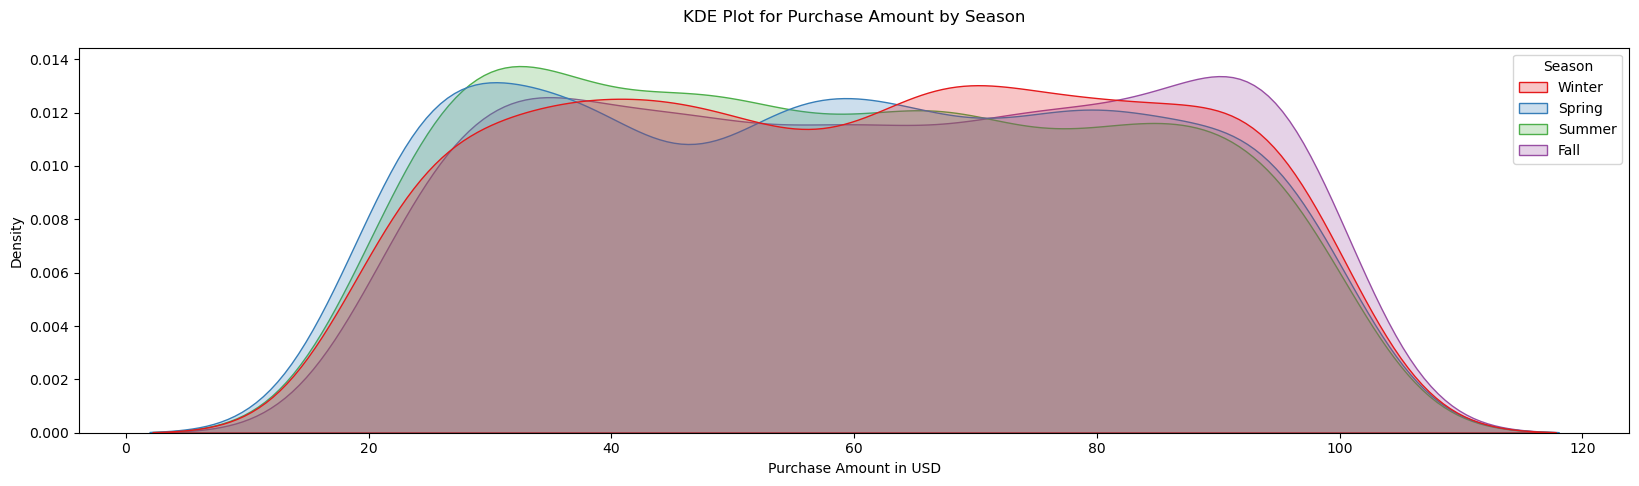

In [55]:
#KDE plot for Purchase Amount by Season

plt.figure(figsize = (20, 5))
sns.kdeplot(data = df, x = 'Purchase Amount (USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot for Purchase Amount by Season\n')
plt.xlabel('Purchase Amount in USD')
plt.show()

In [56]:
#What is the most common payment method for customers who purchased items in the Fall season?

common_payment_fall = df[df['Season'] == 'Fall']['Payment Method'].mode()[0]
print('The most common payment method for customers who purchased items in the Fall season is', common_payment_fall)

The most common payment method for customers who purchased items in the Fall season is Credit Card


In [57]:
#How many customers have made a purchase in each category?

purchase_count_by_category = df['Category'].value_counts()
print('Purchase Count by Category:')
print(purchase_count_by_category)

Purchase Count by Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [58]:
#What is the average age of customers who purchased accessories with a discount applied?

avg_age_accessories_discount = df[(df['Category'] == 'Accessories') & (df['Discount Applied'] == 'Yes')]['Age'].mean()
print('The average age of customers who purchased accessories with a discount applied is', round(avg_age_accessories_discount, 0))

The average age of customers who purchased accessories with a discount applied is 44.0


In [59]:
#What is the total purchase amount for each size of clothing items (XL, L, M, S)?

total_purchase_by_size = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()
print('Total Purchase Amount by Size for Clothing Items:')
print(total_purchase_by_size)

Total Purchase Amount by Size for Clothing Items:
Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64


In [60]:
#What is the total purchase amount for customers who have made more than 40 previous purchases?

total_purchase_above_40_previous = df[df['Previous Purchases'] > 40]['Purchase Amount (USD)'].sum()
print('The total purchase amount for customers who have made more than 40 previous purchases is', total_purchase_above_40_previous)

The total purchase amount for customers who have made more than 40 previous purchases is 46590


In [61]:
#What is the most common location for customers who purchased socks with a discount applied?

common_location_socks_discount = df[(df['Item Purchased'] == 'Socks') & (df['Discount Applied'] == 'Yes')]['Location'].mode()[0]
print('The most common location for customers who purchased socks with a discount applied is', common_location_socks_discount)

The most common location for customers who purchased socks with a discount applied is Georgia


In [62]:
#What is the average purchase amount for customers who have a subscription and used Venmo as the payment method, but did not use a promo code?

avg_purchase_subscription_venmo_no_promo = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Venmo') & (df['Promo Code Used'] == 'No')]['Purchase Amount (USD)'].mean()
print('The average purchase amount for customers who have a subscription and used Venmo as the payment method but did not use a promo code is', round(avg_purchase_subscription_venmo_no_promo, 2))

The average purchase amount for customers who have a subscription and used Venmo as the payment method but did not use a promo code is nan


In [63]:
#What is the most common item purchased by customers in Louisiana with a review rating of 4 or higher?

common_item_high_rating_louisiana = df[(df['Location'] == 'Louisiana') & (df['Review Rating'] >= 4)]['Item Purchased'].mode()[0]
print('The most common item purchased by customers in Louisiana with a review rating of 4 or higher is', common_item_high_rating_louisiana)

The most common item purchased by customers in Louisiana with a review rating of 4 or higher is Sweater


In [64]:
#What is the total purchase amount for customers who made purchases in the Fall season and used a credit card as the payment method?

total_purchase_fall_credit_card = df[(df['Season'] == 'Fall') & (df['Payment Method'] == 'Credit Card')]['Purchase Amount (USD)'].sum()
print('The total purchase amount for customers who made purchases in the Fall season and used a credit card as the payment method is', total_purchase_fall_credit_card)

The total purchase amount for customers who made purchases in the Fall season and used a credit card as the payment method is 11411


In [65]:
#What is the most common category of items purchased by male customers in the Winter season with a review rating below 3?

common_category_low_rating_male_winter = df[(df['Season'] == 'Winter') & (df['Gender'] == 'Male') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print('The most common category of items purchased by male customers in the winter season with a review rating below 3 is', common_category_low_rating_male_winter)

The most common category of items purchased by male customers in the winter season with a review rating below 3 is Clothing


In [66]:
#How many customers have a subscription status of 'Yes' and used a promo code for their purchases?

subscription_promo_count = df[(df['Subscription Status'] == 'Yes') & (df['Promo Code Used'] == 'Yes')]['Customer ID'].count()
print(f"There are {subscription_promo_count} customers having a subscription status of 'Yes' and used a promo code for their purchases")

There are 1053 customers having a subscription status of 'Yes' and used a promo code for their purchases


In [67]:
#What is the correlation between a customer's age and their total previous purchases? Calculate the Pearson correlation coefficient.

correllation_age_previous_purchases = df['Age'].corr(df['Previous Purchases'], method='pearson')
print('Pearson correlation between Age and Previous Purchases is', correllation_age_previous_purchases)

Pearson correlation between Age and Previous Purchases is 0.04044453114289472


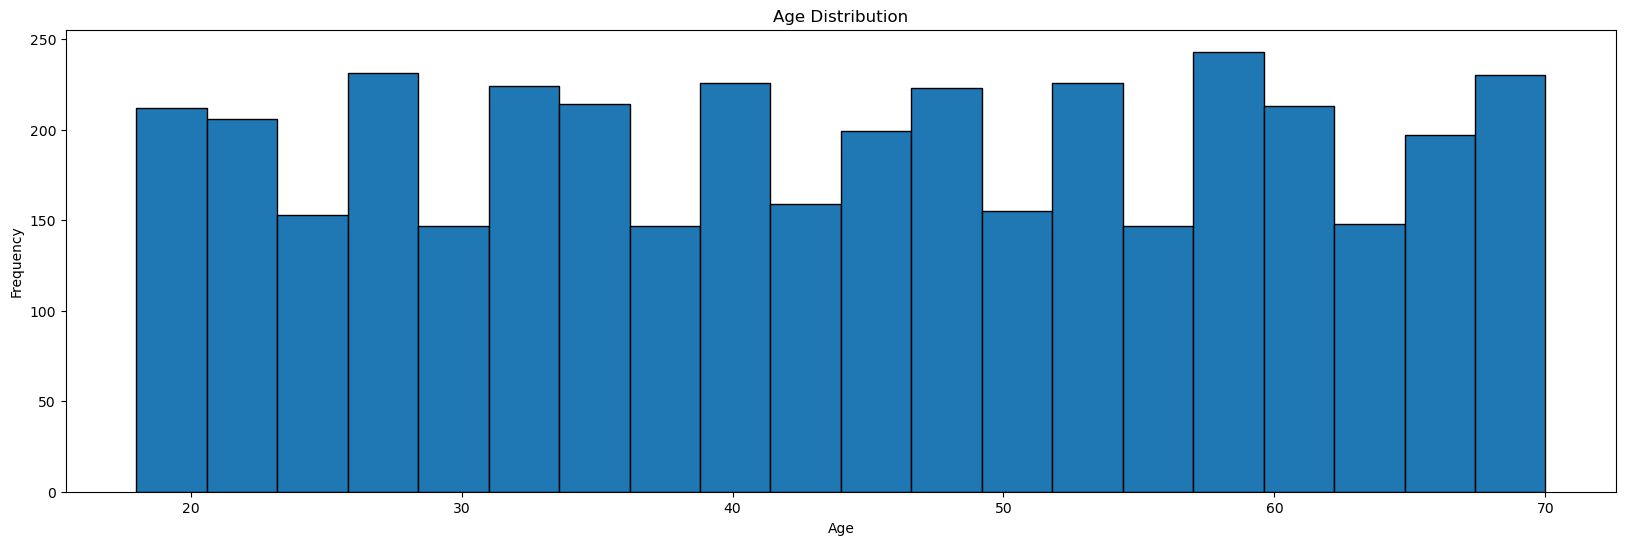

In [68]:
#Histogram of Age Distribution

plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 20, edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

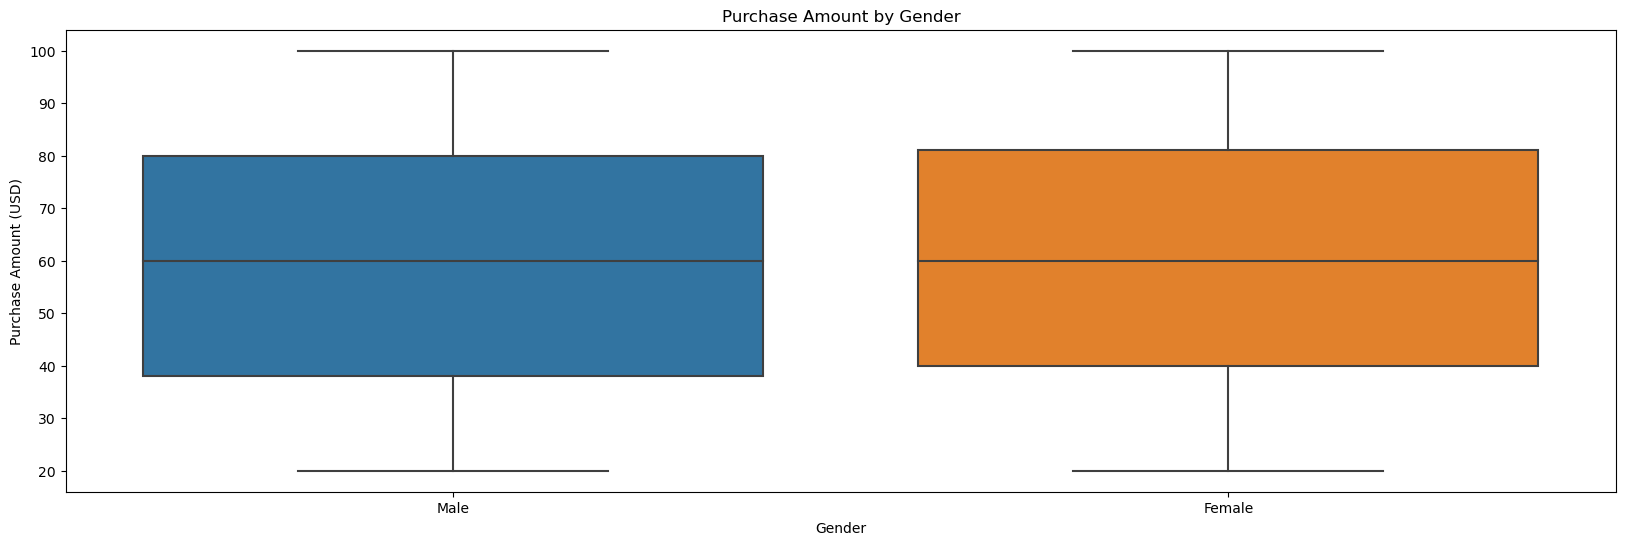

In [69]:
#Box Plot of Purchase Amount by Gender

plt.figure(figsize = (20, 6))
sns.boxplot(x = 'Gender', y = 'Purchase Amount (USD)', data = df)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

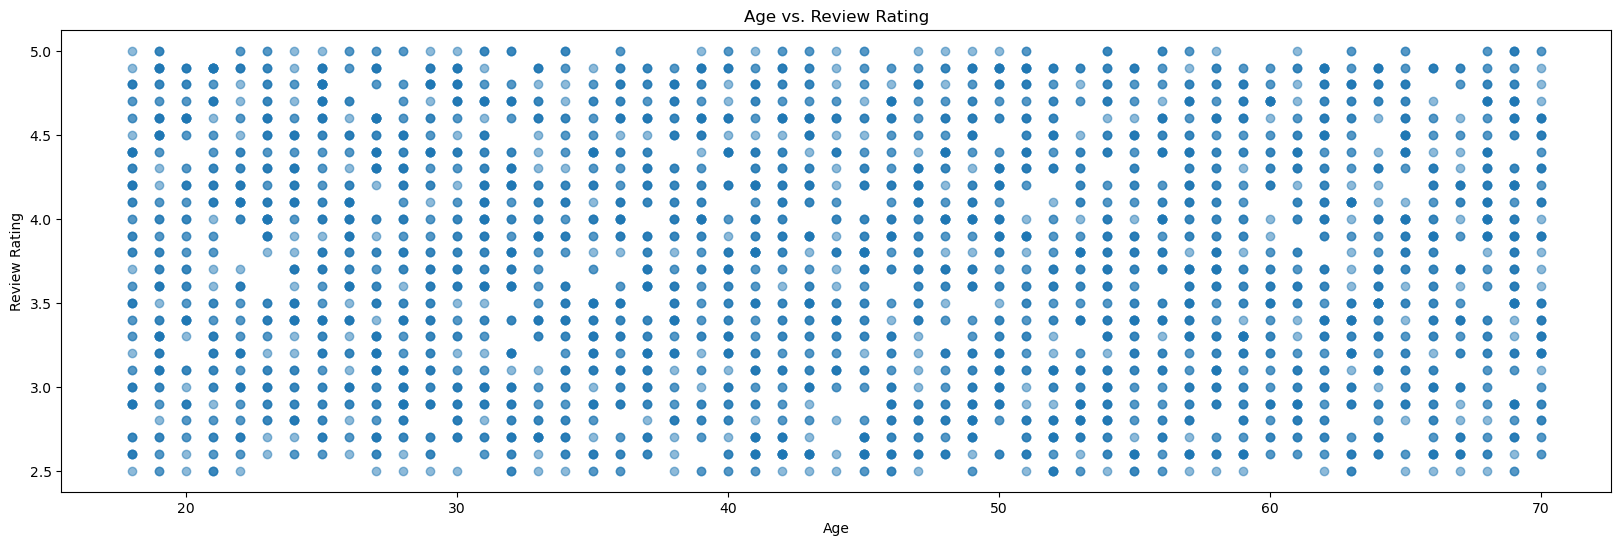

In [70]:
#Scatter plot of age vs. review rating

plt.figure(figsize = (20, 6))
plt.scatter(df['Age'], df['Review Rating'], alpha = 0.5)
plt.title('Age vs. Review Rating')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.show()

<Figure size 2000x600 with 0 Axes>

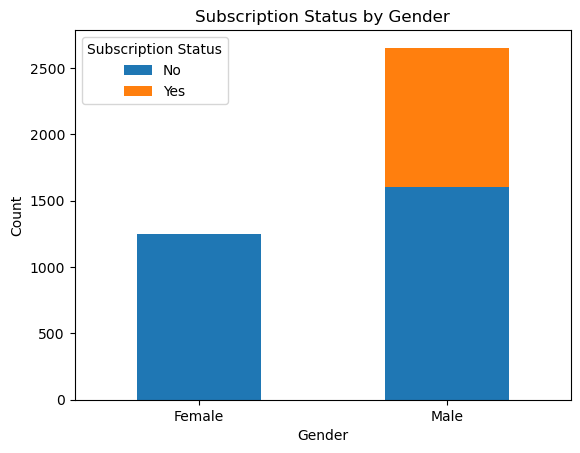

In [71]:
#Stacked bar chart of subscription status by gender

subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind = 'bar', stacked = True, rot = 0)
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

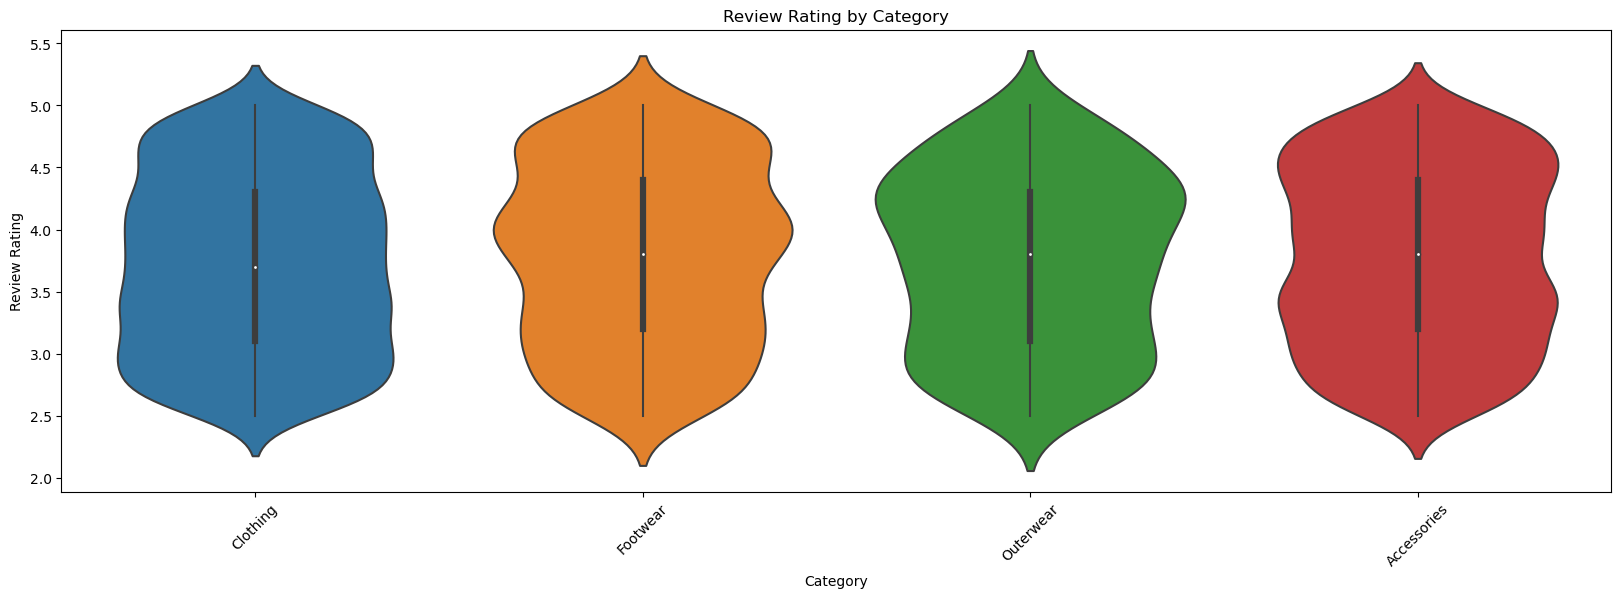

In [72]:
#Violin plot of review rating by category

plt.figure(figsize = (20, 6))
sns.violinplot(x = 'Category', y = 'Review Rating', data = df)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation = 45)
plt.show()

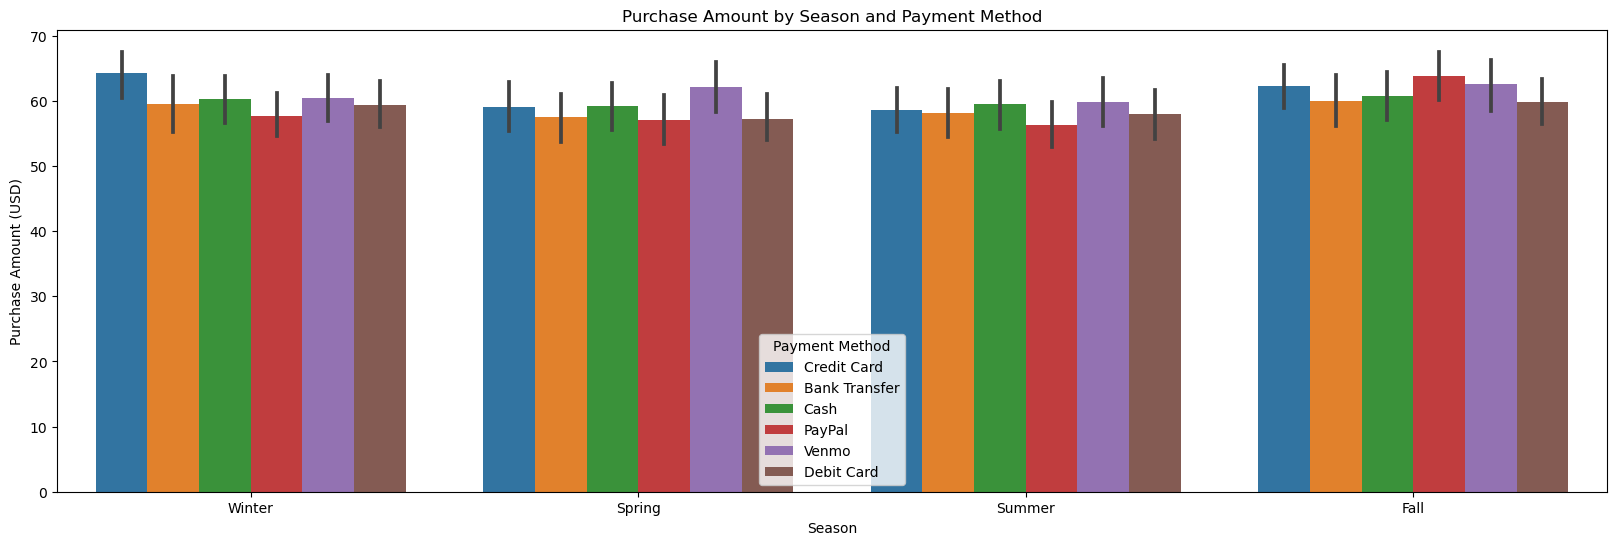

In [ ]:
#Bar plot of purchase amount by season and payment method

plt.figure(figsize = (20, 6))
sns.barplot(x = 'Season', y = 'Purchase Amount (USD)', hue = 'Payment Method', data = df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

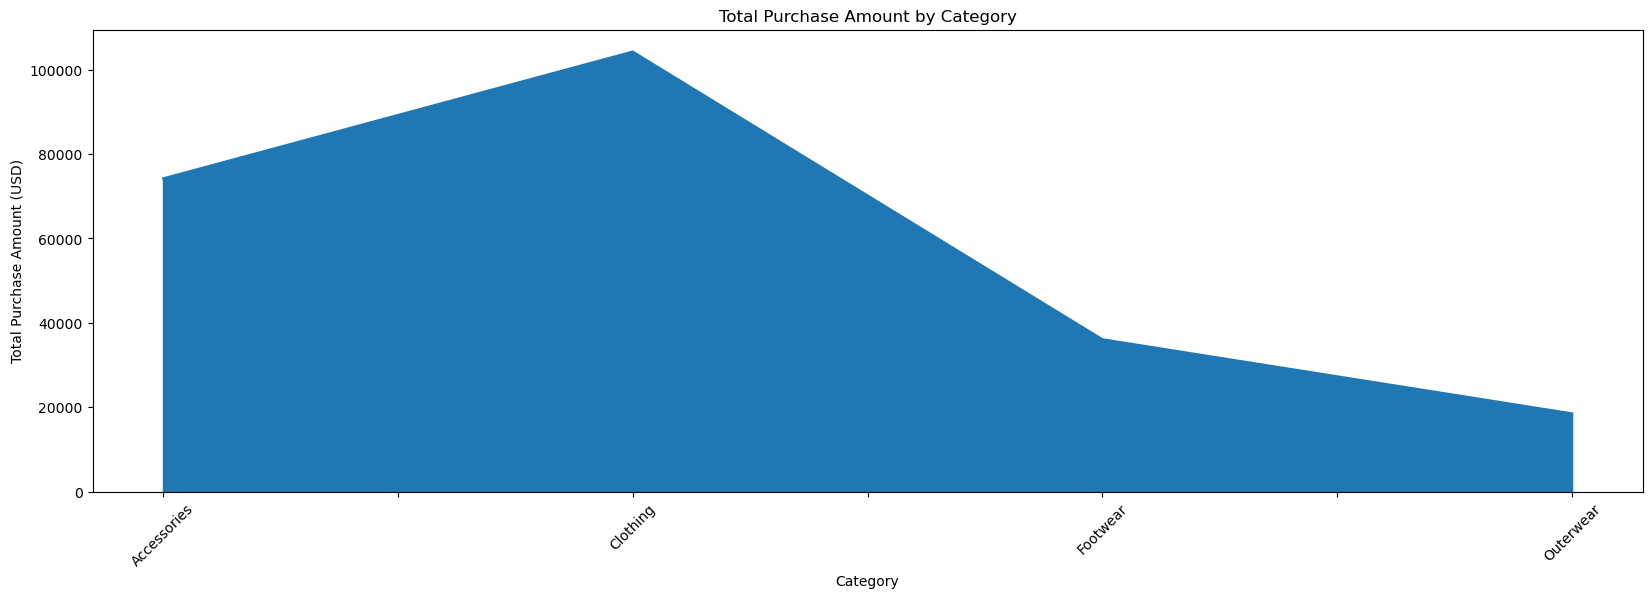

In [75]:
#Area plot of total purchase amount by category

plt.figure(figsize = (20, 6))
category_purchase_total = df.groupby('Category')['Purchase Amount (USD)'].sum()
category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation = 45)
plt.show()

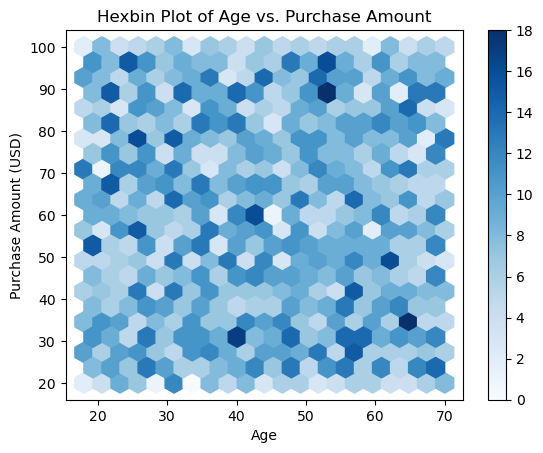

In [76]:
#Hexbin plot of age vs. purchase amount

plt.hexbin(df['Age'], df['Purchase Amount (USD)'], gridsize = 20, cmap = 'Blues')
plt.title('Hexbin Plot of Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.colorbar()
plt.show()

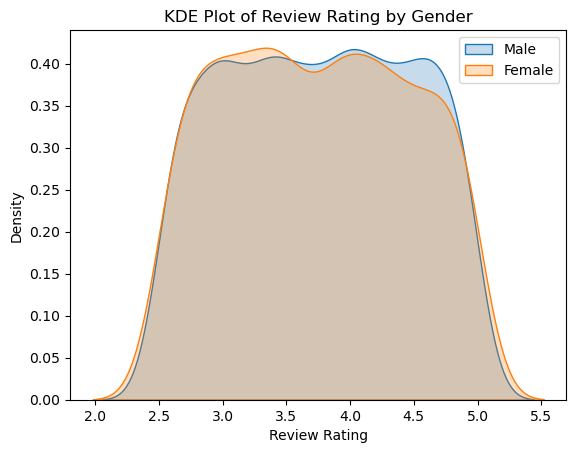

In [77]:
#KDE plot of review rating by gender

sns.kdeplot(df[df['Gender'] == 'Male']['Review Rating'], label = 'Male', shade = True)
sns.kdeplot(df[df['Gender'] == 'Female']['Review Rating'], label = 'Female', shade = True)
plt.title('KDE Plot of Review Rating by Gender')
plt.xlabel('Review Rating')
plt.ylabel('Density')
plt.legend()
plt.show()